#Problem statement:
* This business problem is a supervised learning example for a credit card company. The objective is to
predict the probability of default (whether the customer will pay the credit card bill or not) based on the
variables provided. There are multiple variables on the credit card account, purchase and delinquency
information which can be used in the modelling.
* PD modelling problems are meant for understanding the riskiness of the customers and how much credit is
at stake in case the customer defaults. This is an extremely critical part in any organization that lends money
[both secured and unsecured loans].

#Objective:
* The main objective of this business problem is to predict the probability of defualt for credit card of a bank and also to evaluate the riskiness of the customers to make informed decisions about extending credit.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [6]:
path=("/content/drive/MyDrive/PD_modelling_dataset.xlsx")
df=pd.read_excel(path)

In [7]:
df.head()

,userid,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,4567129.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,...,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333
1,2635118.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,19.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389
2,4804232.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944
3,1442693.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111
4,4575322.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611


In [8]:
df["has_paid"].value_counts()

1.0    77002
0.0    11941
Name: has_paid, dtype: int64

In [ ]:
df.shape

(99979, 36)

* There are 9,99,979 rows and 36 variables in the data set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99979 entries, 0 to 99978
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   userid                            99977 non-null  float64
 1   default                           89977 non-null  float64
 2   acct_amt_added_12_24m             99977 non-null  float64
 3   acct_days_in_dc_12_24m            88141 non-null  float64
 4   acct_days_in_rem_12_24m           88141 non-null  float64
 5   acct_days_in_term_12_24m          88141 non-null  float64
 6   acct_incoming_debt_vs_paid_0_24m  40662 non-null  float64
 7   acct_status                       45604 non-null  float64
 8   acct_worst_status_0_3m            45604 non-null  float64
 9   acct_worst_status_12_24m          33216 non-null  float64
 10  acct_worst_status_3_6m            42275 non-null  float64
 11  acct_worst_status_6_12m           39627 non-null  float64
 12  age 

* There are 33 float type variables and 3 object type variable in the data set.

In [ ]:
df.isnull().sum()

userid                                  2
default                             10002
acct_amt_added_12_24m                   2
acct_days_in_dc_12_24m              11838
acct_days_in_rem_12_24m             11838
acct_days_in_term_12_24m            11838
acct_incoming_debt_vs_paid_0_24m    59317
acct_status                         54375
acct_worst_status_0_3m              54375
acct_worst_status_12_24m            66763
acct_worst_status_3_6m              57704
acct_worst_status_6_12m             60352
age                                     2
avg_payment_span_0_12m              23838
avg_payment_span_0_3m               49307
merchant_category                       2
merchant_group                         11
has_paid                            11036
max_paid_inv_0_12m                  11036
max_paid_inv_0_24m                  11036
name_in_email                       11036
num_active_div_by_paid_inv_0_12m    29927
num_active_inv                      11036
num_arch_dc_0_12m                 

* There are many null values in the data set

In [9]:
df.dropna(subset=["default"],inplace=True)

* Defualt variable has 10,002 values as NA values which is the target variable.
* So I created a subset without NA values for further proceedings.  

In [ ]:
df.isnull().sum()

userid                                  0
default                                 0
acct_amt_added_12_24m                   0
acct_days_in_dc_12_24m              10683
acct_days_in_rem_12_24m             10683
acct_days_in_term_12_24m            10683
acct_incoming_debt_vs_paid_0_24m    53357
acct_status                         48934
acct_worst_status_0_3m              48934
acct_worst_status_12_24m            60055
acct_worst_status_3_6m              51938
acct_worst_status_6_12m             54313
age                                     0
avg_payment_span_0_12m              21468
avg_payment_span_0_3m               44382
merchant_category                       0
merchant_group                          9
has_paid                             9944
max_paid_inv_0_12m                   9944
max_paid_inv_0_24m                   9944
name_in_email                        9944
num_active_div_by_paid_inv_0_12m    26936
num_active_inv                       9944
num_arch_dc_0_12m                 

* After creating a subset of the data set, there are still many null values in the data set.
* Some variables like acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,acct_worst_status_3_6m,acct_worst_status_6_12m,acct_worst_status_6_12m and avg_payment_span_0_3m have more than half ot the data points as null values.


In [ ]:
df.shape

(89977, 36)

In [10]:
df.drop(["acct_incoming_debt_vs_paid_0_24m","acct_status","acct_worst_status_0_3m","acct_worst_status_12_24m",
               "acct_worst_status_3_6m","acct_worst_status_6_12m","avg_payment_span_0_3m"],axis=1,inplace=True)

* Dropped variables from the data set which have more than half of the values as null values.

In [ ]:
df["default"].value_counts()

0.0        88688
1.0         1288
10000.0        1
Name: default, dtype: int64

In [11]:
df["default"]=df["default"].replace(10000,1)

In [ ]:
df["default"].value_counts(normalize=True)

0.0    0.985674
1.0    0.014326
Name: default, dtype: float64

* 98% of the target variable has class 0 and only 1.4% of the target variable has class 1.

In [ ]:
df.isnull().sum()

userid                                  0
default                                 0
acct_amt_added_12_24m                   0
acct_days_in_dc_12_24m              10683
acct_days_in_rem_12_24m             10683
acct_days_in_term_12_24m            10683
age                                     0
avg_payment_span_0_12m              21468
merchant_category                       0
merchant_group                          9
has_paid                             9944
max_paid_inv_0_12m                   9944
max_paid_inv_0_24m                   9944
name_in_email                        9944
num_active_div_by_paid_inv_0_12m    26936
num_active_inv                       9944
num_arch_dc_0_12m                    9944
num_arch_dc_12_24m                   9944
num_arch_ok_0_12m                    9944
num_arch_ok_12_24m                   9944
num_arch_rem_0_12m                   9944
status_max_archived_0_6_months       9944
status_max_archived_0_12_months      9944
status_max_archived_0_24_months   

In [12]:
data=df[df.isnull().sum(axis=1) <=5]

* Subset of the data frame df is taken as data, this data set is obtained after filtering out the variables whose rows has only less than or equal to 5 null values in each individual row.
* By using this, we get to keep the most of the data without loosing.

In [ ]:
data.shape

(80033, 29)

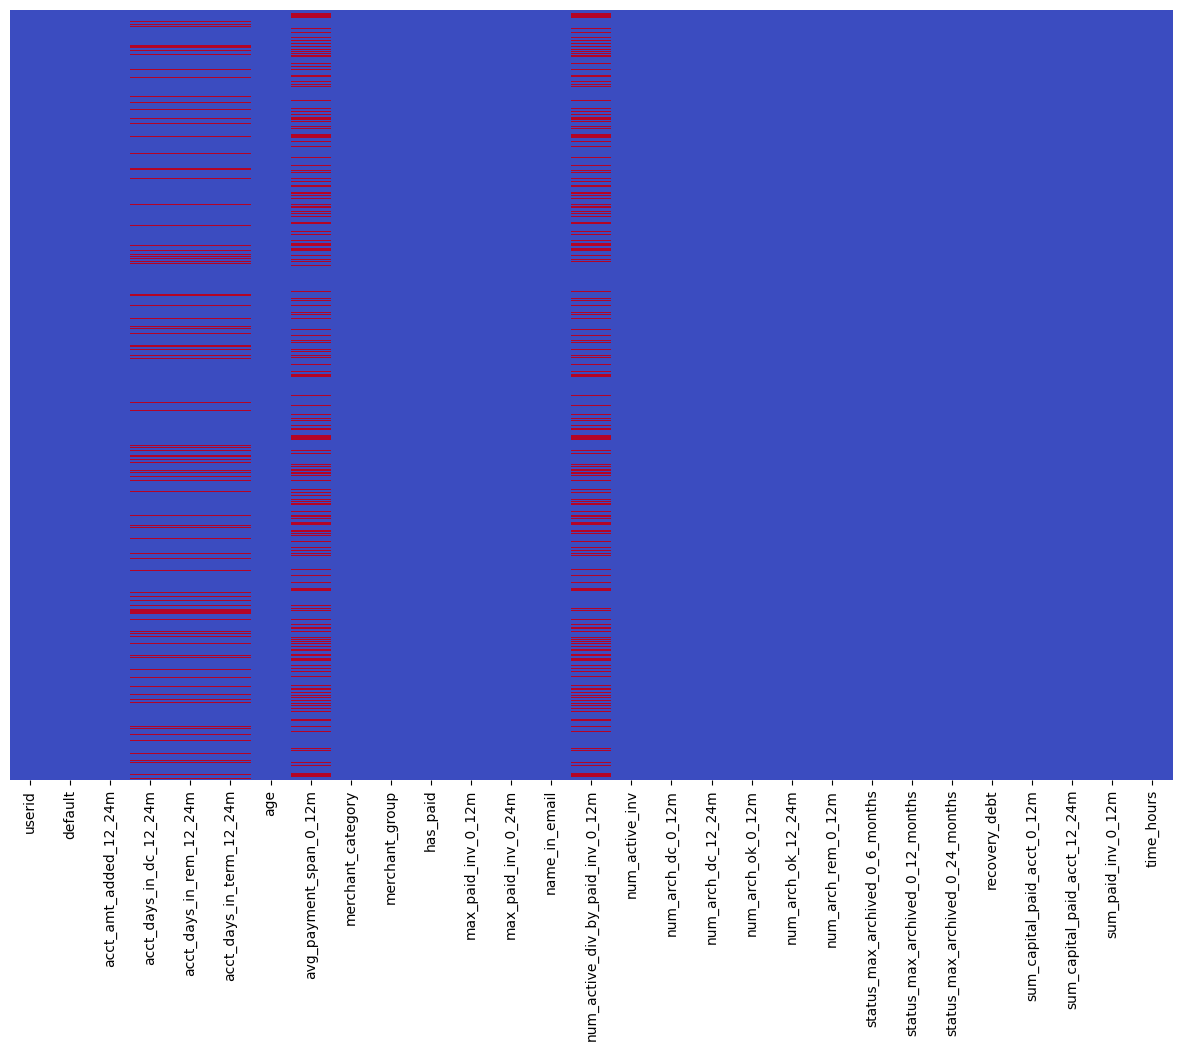

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(),cbar=False,cmap="coolwarm",yticklabels=False)
plt.show()

In [ ]:
data.isnull().sum()

userid                                  0
default                                 0
acct_amt_added_12_24m                   0
acct_days_in_dc_12_24m               9496
acct_days_in_rem_12_24m              9496
acct_days_in_term_12_24m             9496
age                                     0
avg_payment_span_0_12m              17702
merchant_category                       0
merchant_group                          0
has_paid                                0
max_paid_inv_0_12m                      0
max_paid_inv_0_24m                      0
name_in_email                           0
num_active_div_by_paid_inv_0_12m    16992
num_active_inv                          0
num_arch_dc_0_12m                       0
num_arch_dc_12_24m                      0
num_arch_ok_0_12m                       0
num_arch_ok_12_24m                      0
num_arch_rem_0_12m                      0
status_max_archived_0_6_months          0
status_max_archived_0_12_months         0
status_max_archived_0_24_months   

In [ ]:
data["acct_days_in_dc_12_24m"].value_counts()

0.0        70336
9.0           10
28.0           8
42.0           8
56.0           7
           ...  
125.0          1
147.0          1
21.0           1
127.0          1
11836.0        1
Name: acct_days_in_dc_12_24m, Length: 108, dtype: int64

In [ ]:
data["acct_days_in_rem_12_24m"].value_counts()

0.0        62823
1.0          432
2.0          257
21.0         208
15.0         193
           ...  
191.0          1
354.0          1
242.0          1
341.0          1
11836.0        1
Name: acct_days_in_rem_12_24m, Length: 271, dtype: int64

In [ ]:
data["acct_days_in_term_12_24m"].value_counts()

0.0        69573
34.0         217
7.0           49
1.0           42
2.0           36
           ...  
53.0           1
36.0           1
64.0           1
50.0           1
11836.0        1
Name: acct_days_in_term_12_24m, Length: 61, dtype: int64

In [ ]:
data["avg_payment_span_0_12m"].value_counts()

14.000000       1682
13.000000       1446
15.000000       1001
12.000000        972
16.000000        944
                ... 
10.593750          1
13.617647          1
5.190476           1
29.150000          1
23836.000000       1
Name: avg_payment_span_0_12m, Length: 7386, dtype: int64

In [ ]:
data["num_active_div_by_paid_inv_0_12m"].value_counts()

0.000000        39615
1.000000         1892
0.500000         1809
0.333333         1522
0.250000         1372
                ...  
0.087912            1
0.073892            1
0.021978            1
0.365854            1
18891.000000        1
Name: num_active_div_by_paid_inv_0_12m, Length: 819, dtype: int64

In [13]:
data.drop(["acct_days_in_dc_12_24m","acct_days_in_rem_12_24m","num_active_div_by_paid_inv_0_12m",
           "acct_days_in_term_12_24m","avg_payment_span_0_12m"],axis=1,inplace=True)

* Varibles like acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,num_active_div_by_paid_inv_0_12m,acct_days_in_term_12_24m and avg_payment_span_0_12m has around 80% of the values as 0.
* This variables will not much be helpfull for us for model building, so I dropped those variables from the data set.

In [ ]:
data.shape

(80033, 24)

<Axes: >

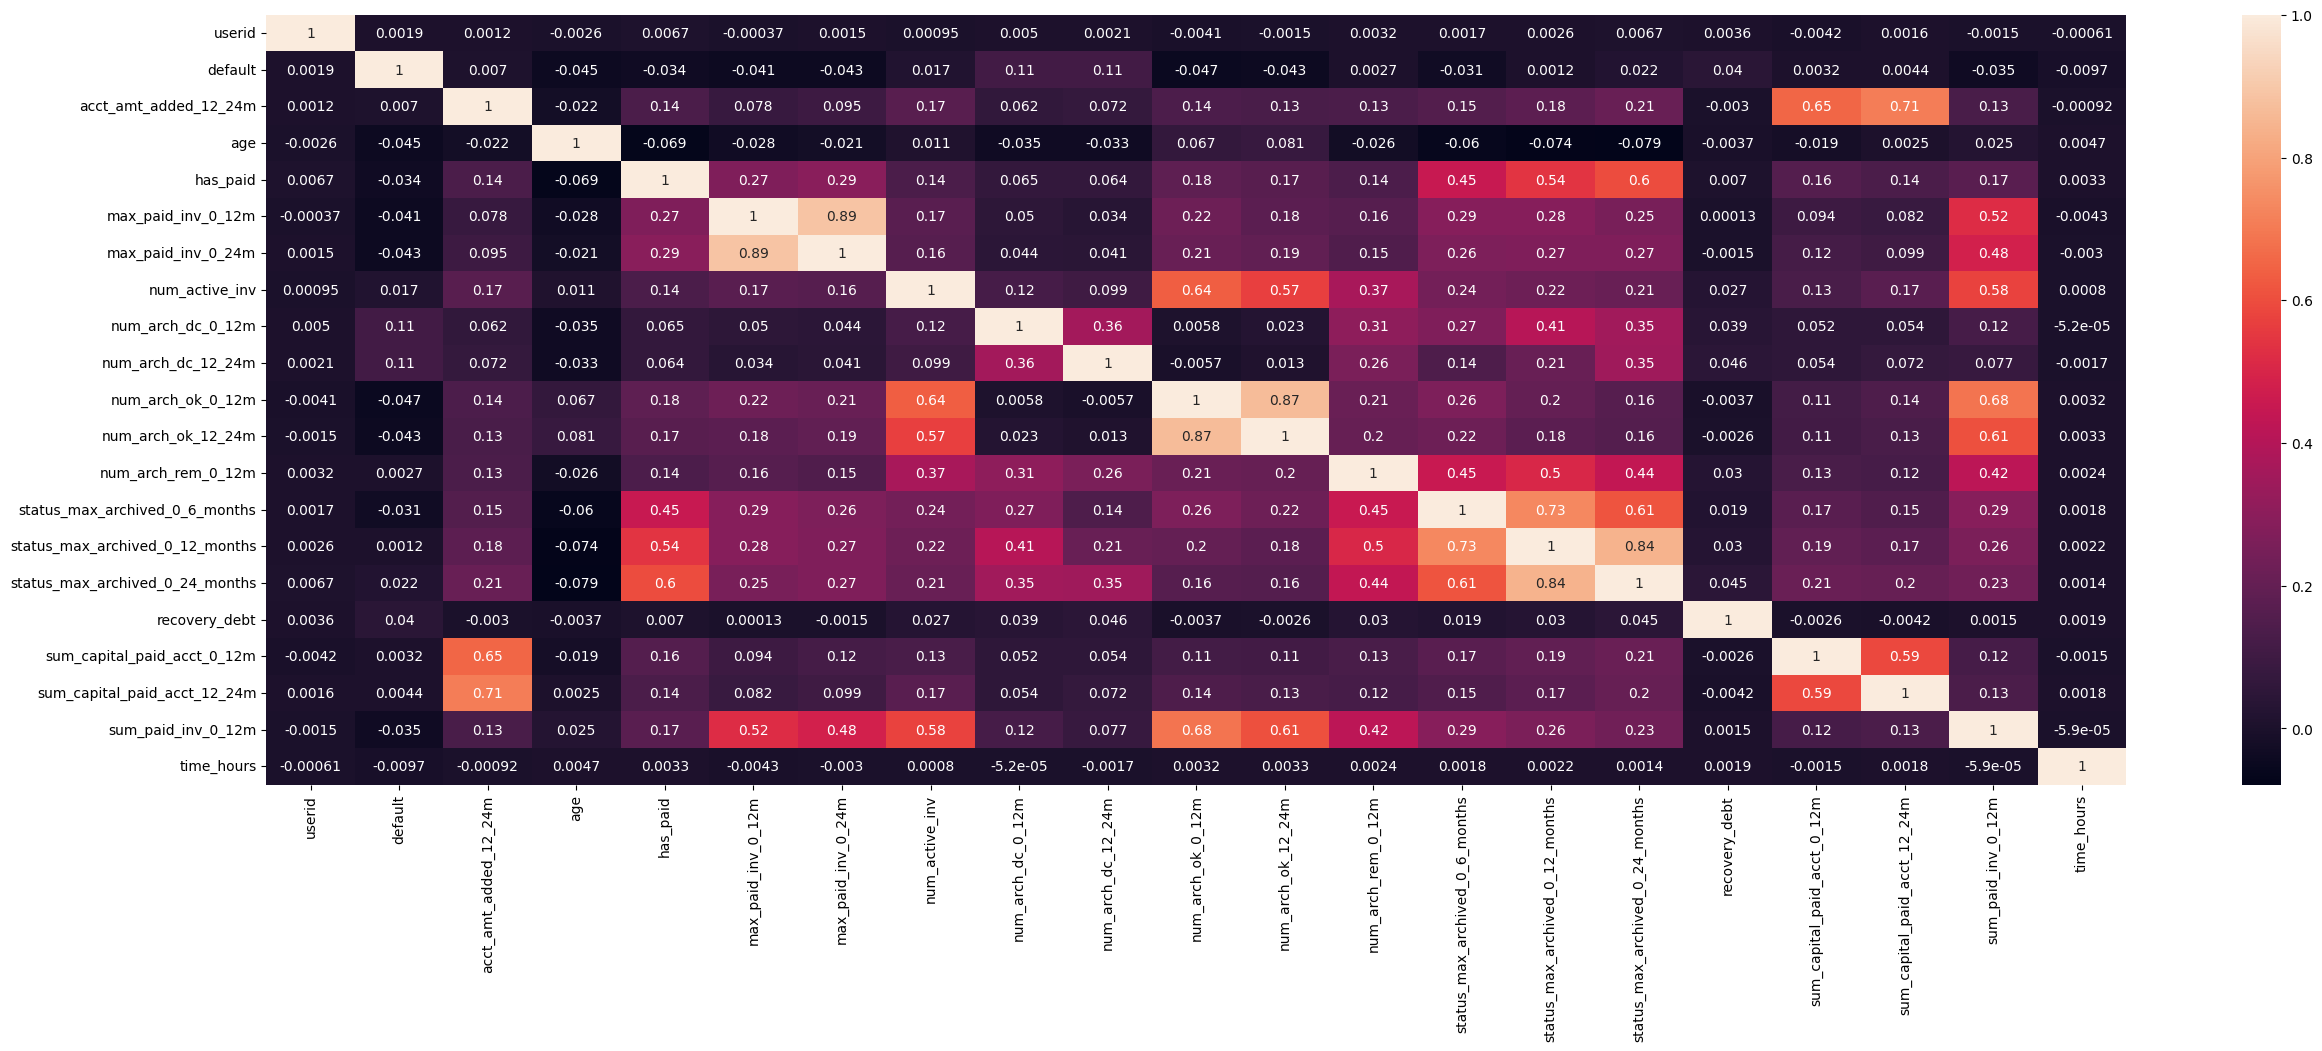

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(data=data.corr(),cbar=True,annot=True)

In [ ]:
data.head()

,userid,default,acct_amt_added_12_24m,age,merchant_category,merchant_group,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,name_in_email,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,4567129.0,0.0,0.0,20.0,Dietary supplements,Health & Beauty,1.0,31638.0,31638.0,no_match,...,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333
1,2635118.0,0.0,0.0,50.0,Books & Magazines,Entertainment,1.0,13749.0,13749.0,F+L,...,19.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389
2,4804232.0,0.0,0.0,22.0,Diversified entertainment,Entertainment,1.0,29890.0,29890.0,L1+F,...,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944
3,1442693.0,0.0,0.0,36.0,Diversified entertainment,Entertainment,1.0,40040.0,40040.0,F1+L,...,21.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111
4,4575322.0,0.0,0.0,25.0,Electronic equipment & Related accessories,Electronics,1.0,7100.0,7100.0,F+L,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611


In [14]:
df_num=data.select_dtypes(["float64"])
df_cat=data.select_dtypes(["object"])

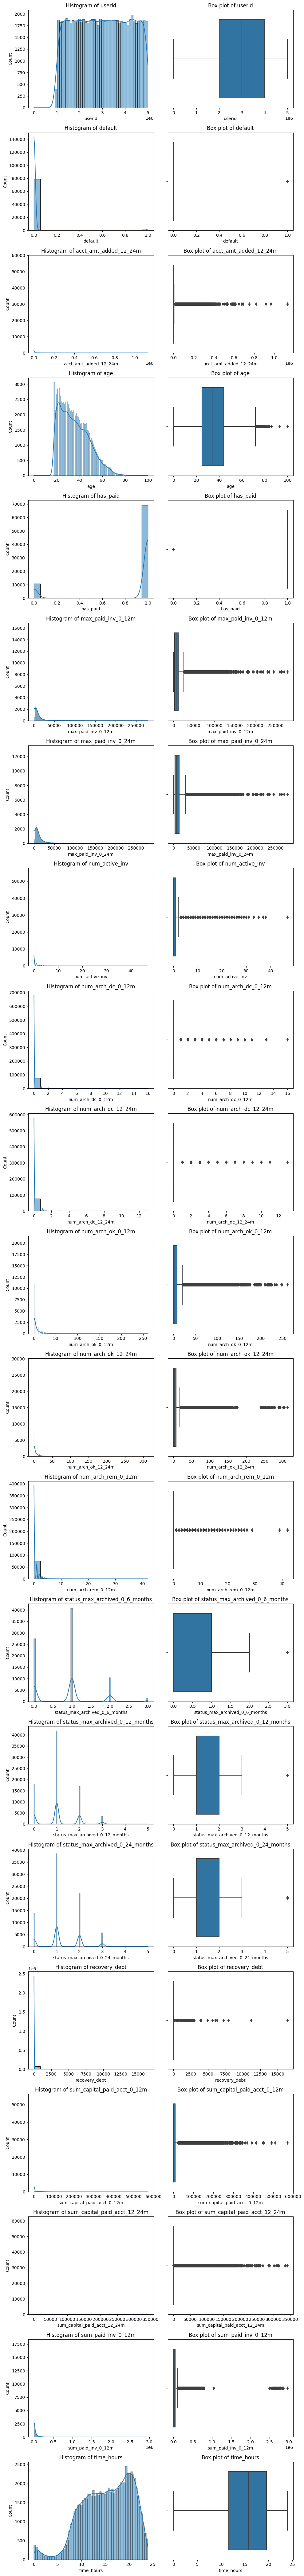

In [ ]:
fig, axes=plt.subplots(nrows=len(df_num.columns),ncols=2,figsize=(10,4*len(df_num.columns)))
for i, column in enumerate(df_num.columns):
  sns.histplot(data=df_num[column],kde=True,ax=axes[i,0])
  axes[i,0].set_title("Histogram of " +column)

  sns.boxplot(x=df_num[column],ax=axes[i,1])
  axes[i,1].set_title("Box plot of " +column)

plt.tight_layout()
plt.show()

In [ ]:
data["acct_amt_added_12_24m"].value_counts()

0.0        57019
50.0          29
30.0          29
90.0          21
100.0         19
           ...  
41209.0        1
27822.0        1
9233.0         1
72461.0        1
11018.0        1
Name: acct_amt_added_12_24m, Length: 19763, dtype: int64

In [ ]:
data["has_paid"].value_counts()

1.0    69287
0.0    10746
Name: has_paid, dtype: int64

In [ ]:
data["max_paid_inv_0_12m"].value_counts()

0.0        16047
5290.0       372
4290.0       315
895.0        304
6790.0       229
           ...  
98100.0        1
9906.0         1
9313.0         1
12915.0        1
7444.0         1
Name: max_paid_inv_0_12m, Length: 11266, dtype: int64

In [ ]:
data["max_paid_inv_0_24m"].value_counts()

0.0        12856
5290.0       358
4290.0       234
6290.0       209
3290.0       194
           ...  
6484.0         1
6352.0         1
21931.0        1
25466.0        1
29860.0        1
Name: max_paid_inv_0_24m, Length: 11711, dtype: int64

In [ ]:
data["num_active_inv"].value_counts()

0.0     54976
1.0     15027
2.0      5209
3.0      2122
4.0      1006
5.0       546
6.0       344
7.0       190
8.0       132
9.0        93
10.0       70
11.0       41
12.0       36
13.0       35
15.0       29
14.0       26
16.0       22
20.0       14
21.0       13
18.0       13
24.0       12
17.0       11
26.0        9
22.0        9
23.0        8
28.0        7
27.0        7
19.0        6
33.0        4
37.0        3
25.0        3
29.0        3
30.0        2
35.0        2
38.0        1
47.0        1
31.0        1
Name: num_active_inv, dtype: int64

In [ ]:
data["num_arch_dc_0_12m"].value_counts()

0.0     76610
1.0      2551
2.0       551
3.0       164
4.0        65
6.0        31
5.0        25
7.0        18
13.0        4
10.0        4
8.0         4
11.0        3
9.0         2
16.0        1
Name: num_arch_dc_0_12m, dtype: int64

In [ ]:
data["num_arch_dc_12_24m"].value_counts()

0.0     76815
1.0      2346
2.0       541
3.0       158
4.0        89
5.0        41
7.0        16
6.0        14
10.0        6
11.0        2
9.0         2
8.0         2
13.0        1
Name: num_arch_dc_12_24m, dtype: int64

In [ ]:
data["num_arch_ok_0_12m"].value_counts()

0.0      20530
1.0      11020
2.0       7873
3.0       5942
4.0       4721
         ...  
236.0        1
148.0        1
152.0        1
217.0        1
247.0        1
Name: num_arch_ok_0_12m, Length: 200, dtype: int64

In [ ]:
data["num_arch_ok_12_24m"].value_counts()

0.0      28660
1.0       8753
2.0       6673
3.0       5100
4.0       3955
         ...  
173.0        1
172.0        1
288.0        1
249.0        1
273.0        1
Name: num_arch_ok_12_24m, Length: 198, dtype: int64

In [ ]:
data["num_arch_rem_0_12m"].value_counts()

0.0     61048
1.0     10925
2.0      3933
3.0      1887
4.0       899
5.0       488
6.0       262
7.0       187
8.0        97
9.0        66
11.0       37
10.0       35
13.0       29
12.0       22
16.0       16
17.0       16
24.0       13
14.0       12
15.0       10
29.0        9
21.0        8
26.0        5
18.0        5
23.0        5
27.0        5
25.0        4
42.0        3
39.0        2
19.0        2
20.0        2
22.0        1
Name: num_arch_rem_0_12m, dtype: int64

In [ ]:
data["status_max_archived_0_6_months"].value_counts()

1.0    40735
0.0    27505
2.0    10357
3.0     1436
Name: status_max_archived_0_6_months, dtype: int64

In [ ]:
data["status_max_archived_0_12_months"].value_counts()

1.0    41810
0.0    17881
2.0    16882
3.0     3455
5.0        5
Name: status_max_archived_0_12_months, dtype: int64

In [ ]:
data["status_max_archived_0_24_months"].value_counts()

1.0    38559
2.0    22050
0.0    13685
3.0     5726
5.0       13
Name: status_max_archived_0_24_months, dtype: int64

In [ ]:
data["recovery_debt"].value_counts()

0.0       79854
500.0        39
1000.0       23
1500.0        7
2190.0        6
          ...  
1195.0        1
7200.0        1
1059.0        1
1990.0        1
1518.0        1
Name: recovery_debt, Length: 89, dtype: int64

In [ ]:
data["sum_capital_paid_acct_0_12m"].value_counts()

0.0        52833
300.0         32
2990.0        32
31067.0       23
700.0         22
           ...  
49050.0        1
10516.0        1
4088.0         1
31360.0        1
9660.0         1
Name: sum_capital_paid_acct_0_12m, Length: 18995, dtype: int64

In [ ]:
data["sum_capital_paid_acct_12_24m"].value_counts()

0.0        59741
300.0         55
96974.0       32
20390.0       27
3485.0        23
           ...  
28736.0        1
33604.0        1
5025.0         1
9191.0         1
11615.0        1
Name: sum_capital_paid_acct_12_24m, Length: 14114, dtype: int64

In [ ]:
data["sum_paid_inv_0_12m"].value_counts()

0.0        16047
895.0        201
1790.0       119
1000.0        82
2000.0        72
           ...  
45250.0        1
30986.0        1
8246.0         1
40960.0        1
47306.0        1
Name: sum_paid_inv_0_12m, Length: 33721, dtype: int64

In [15]:
df=pd.concat([df_num,df_cat],axis=1,join="inner")
df.head()

,userid,default,acct_amt_added_12_24m,age,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_inv,num_arch_dc_0_12m,num_arch_dc_12_24m,...,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours,merchant_category,merchant_group,name_in_email
0,4567129.0,0.0,0.0,20.0,1.0,31638.0,31638.0,2.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333,Dietary supplements,Health & Beauty,no_match
1,2635118.0,0.0,0.0,50.0,1.0,13749.0,13749.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389,Books & Magazines,Entertainment,F+L
2,4804232.0,0.0,0.0,22.0,1.0,29890.0,29890.0,1.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944,Diversified entertainment,Entertainment,L1+F
3,1442693.0,0.0,0.0,36.0,1.0,40040.0,40040.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111,Diversified entertainment,Entertainment,F1+L
4,4575322.0,0.0,0.0,25.0,1.0,7100.0,7100.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611,Electronic equipment & Related accessories,Electronics,F+L


In [16]:
df1=df.drop(["userid","default","merchant_category","merchant_group","name_in_email","has_paid"],axis=1)
df1.head()

,acct_amt_added_12_24m,age,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_inv,num_arch_dc_0_12m,num_arch_dc_12_24m,num_arch_ok_0_12m,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,0.0,20.0,31638.0,31638.0,2.0,0.0,0.0,13.0,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333
1,0.0,50.0,13749.0,13749.0,0.0,0.0,0.0,9.0,19.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389
2,0.0,22.0,29890.0,29890.0,1.0,0.0,0.0,11.0,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944
3,0.0,36.0,40040.0,40040.0,1.0,0.0,0.0,31.0,21.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111
4,0.0,25.0,7100.0,7100.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611


In [ ]:
df1.shape

(80033, 18)

In [17]:
selected_features=["userid","default","merchant_category","merchant_group","name_in_email","has_paid"]
df2=pd.DataFrame(df,columns=selected_features)
df2.head()

,userid,default,merchant_category,merchant_group,name_in_email,has_paid
0,4567129.0,0.0,Dietary supplements,Health & Beauty,no_match,1.0
1,2635118.0,0.0,Books & Magazines,Entertainment,F+L,1.0
2,4804232.0,0.0,Diversified entertainment,Entertainment,L1+F,1.0
3,1442693.0,0.0,Diversified entertainment,Entertainment,F1+L,1.0
4,4575322.0,0.0,Electronic equipment & Related accessories,Electronics,F+L,1.0


* Created 2 Data frames, a dataframe with categorical and other variables like target variable - default and userid variable and has_paid variable,
as these variables doesnt need outlier treatment.
* The other data frame with all the other numerical variables, as there are more outliers in the data set.

In [18]:
def treat_outlier(x):
  q25=np.percentile(x,25)
  q75=np.percentile(x,75)
  IQR=q75-q25
  lower_range=q25-(IQR*1.5)
  upper_range=q75+(IQR*1.5)
  return lower_range,upper_range

In [19]:
feature_list=df1.columns
for i in feature_list:
  ll,ul=treat_outlier(df1[i])
  df1[i]=np.where(df1[i]<ll,ll,df1[i])
  df1[i]=np.where(df1[i]>ul,ul,df1[i])


* By using IQR, 25th and 75th percentiles of the variables, upper limits and lower limits of all the variables are calculated.
* Outliers are treated by capping the outliers to upper limit and lower limits of the variables.
* Below are the box plots of variables after treating outliers.
* Aftet treating the outliers, some variables like num_arch_dc_0_12m,num_arch_rem_0_12m,recovery_debt and num_arch_dc_12_24m are capped to onli 1 values, so I dropped these variables from the data set.
* Droppped userid variable as it is of not much use for our model building.

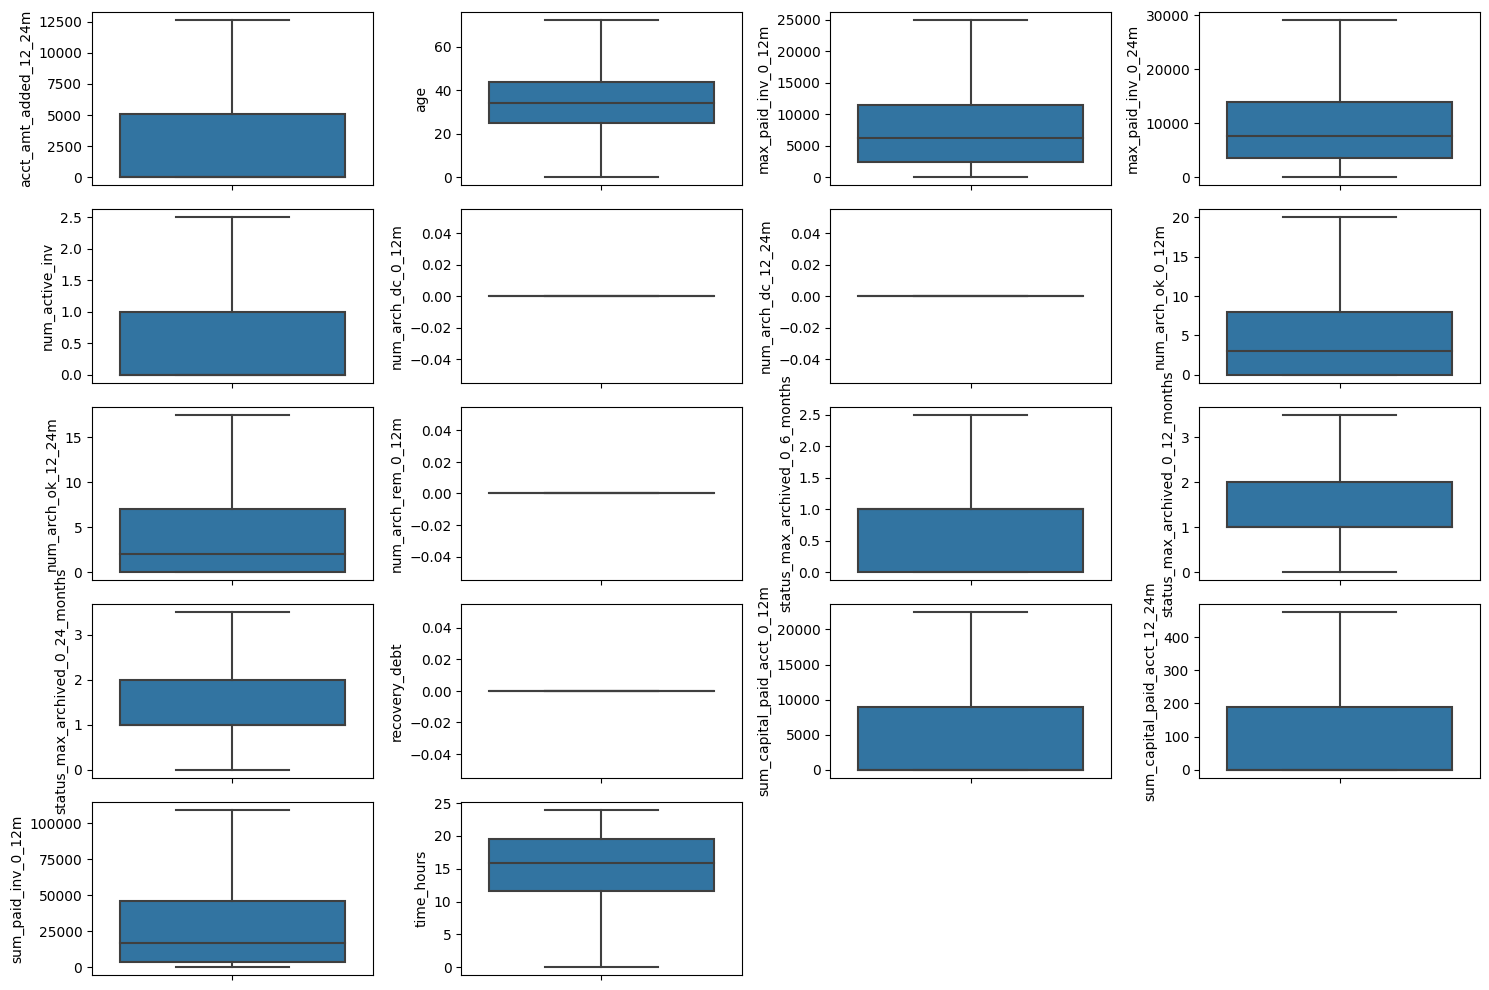

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(feature_list)):
  plt.subplot(5,4,i+1)
  sns.boxplot(y=df1[feature_list[i]])
  plt.tight_layout()

In [20]:
df=pd.concat([df2,df1],axis=1,join="inner")
df.head()

,userid,default,merchant_category,merchant_group,name_in_email,has_paid,acct_amt_added_12_24m,age,max_paid_inv_0_12m,max_paid_inv_0_24m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,4567129.0,0.0,Dietary supplements,Health & Beauty,no_match,1.0,0.0,20.0,24965.0,29202.5,...,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,109472.5,9.653333
1,2635118.0,0.0,Books & Magazines,Entertainment,F+L,1.0,0.0,50.0,13749.0,13749.0,...,17.5,0.0,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389
2,4804232.0,0.0,Diversified entertainment,Entertainment,L1+F,1.0,0.0,22.0,24965.0,29202.5,...,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,109472.5,11.561944
3,1442693.0,0.0,Diversified entertainment,Entertainment,F1+L,1.0,0.0,36.0,24965.0,29202.5,...,17.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,109472.5,15.751111
4,4575322.0,0.0,Electronic equipment & Related accessories,Electronics,F+L,1.0,0.0,25.0,7100.0,7100.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611


In [ ]:
df["merchant_category"].value_counts()

Diversified entertainment                                  34781
Youthful Shoes & Clothing                                  10524
Books & Magazines                                           8447
General Shoes & Clothing                                    4162
Dietary supplements                                         2777
Diversified children products                               2691
Diversified electronics                                     1627
Children Clothes & Nurturing products                       1357
Pet supplies                                                1185
Electronic equipment & Related accessories                   946
Jewelry & Watches                                            815
Prescription optics                                          803
Body & Hair Care                                             766
Automotive Parts & Accessories                               749
Diversified Health & Beauty products                         710
Diversified Home & Garden

In [ ]:
df["merchant_group"].value_counts()

Entertainment            43940
Clothing & Shoes         15033
Health & Beauty           6589
Children Products         4614
Home & Garden             3350
Electronics               2704
Intangible products       1017
Jewelry & Accessories      946
Automotive Products        848
Erotic Materials           670
Food & Beverage            321
0                            1
Name: merchant_group, dtype: int64

In [ ]:
df["name_in_email"].value_counts()

F+L         32220
no_match    13075
L1+F        12881
F            8225
Nick         6697
F1+L         5867
L            1048
Initials       19
0               1
Name: name_in_email, dtype: int64

In [21]:
df["merchant_category"]=df["merchant_category"].replace(0,"Diversified entertainment")
df["merchant_group"]=df["merchant_group"].replace(0,"Entertainment")
df["name_in_email"]=df["name_in_email"].replace(0,"F+L")

In [22]:
df.drop(["userid","num_arch_dc_0_12m","num_arch_rem_0_12m","recovery_debt","num_arch_dc_12_24m"],axis=1,inplace=True)

In [ ]:
df.shape

(80033, 19)

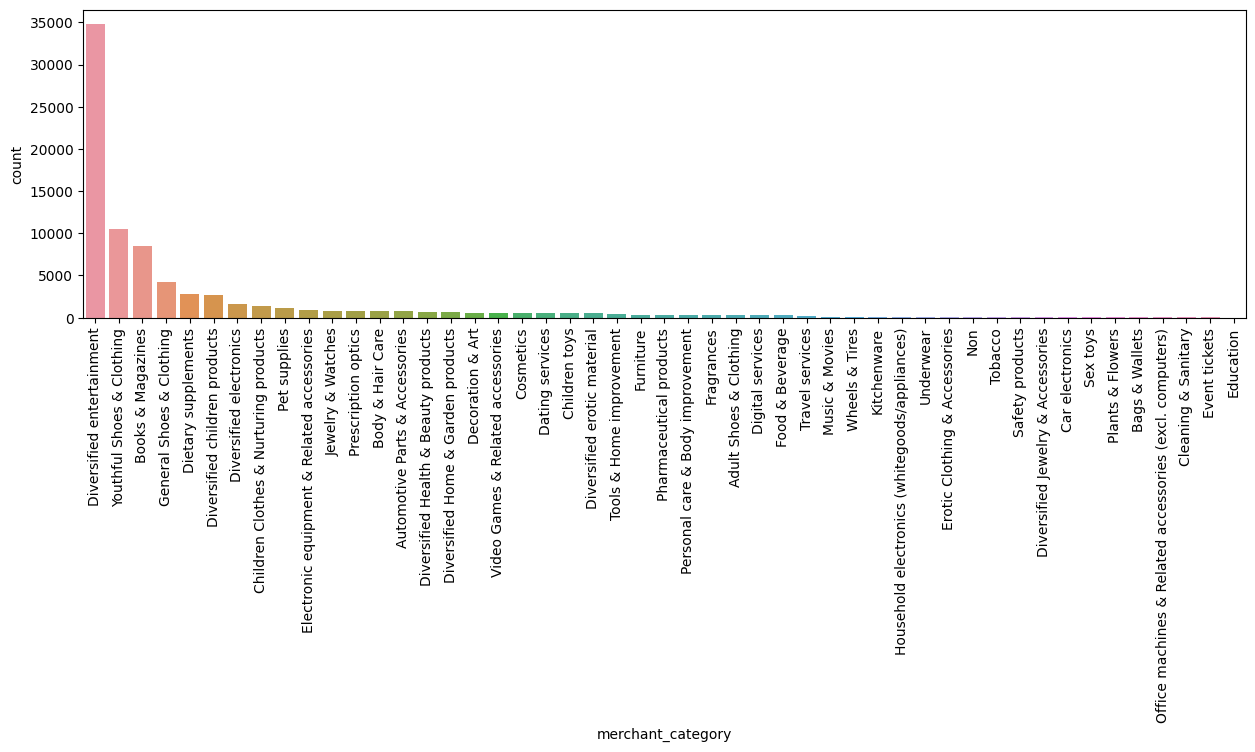

In [ ]:
category_order=df["merchant_category"].value_counts().index
plt.figure(figsize=(15,4))
sns.countplot(x=df["merchant_category"],order=category_order);
plt.xticks(rotation=90)
plt.show()

* Most of the transactions in the data set of merchant category - divesified entertainment, followed by youthfull shoes and clothing and least number of trasactions are from education category

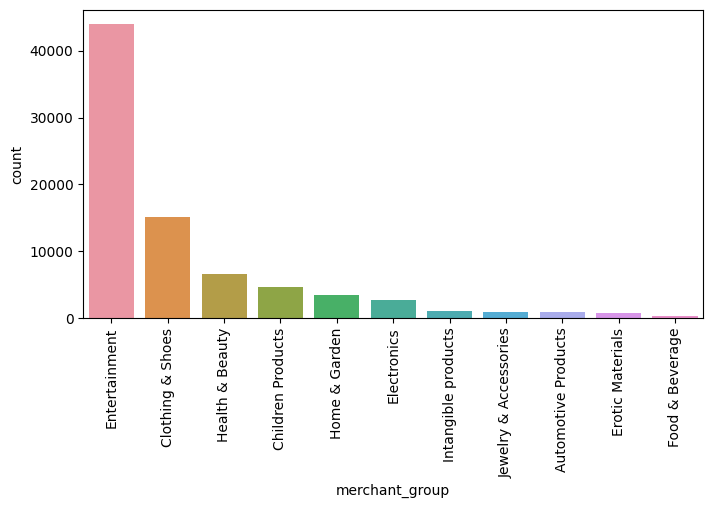

In [ ]:
category_order=df["merchant_group"].value_counts().index
plt.figure(figsize=(8,4))
sns.countplot(x=df["merchant_group"],order=category_order)
plt.xticks(rotation=90)
plt.show()

* Most of the transactions in the data set are of merchant group -Entertainment, followed by clothing and shoes and least number of transactions are of food & bevarage.

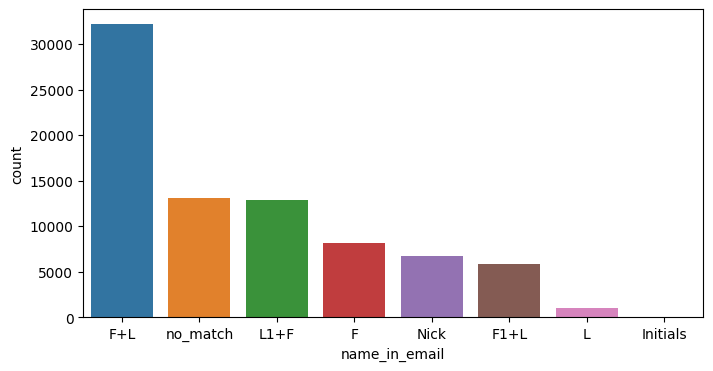

In [ ]:
category_order=df["name_in_email"].value_counts().index
plt.figure(figsize=(8,4))
sns.countplot(x=df["name_in_email"],order=category_order)
plt.show()

* Most of the transactions has name in email as F+L and least has initials

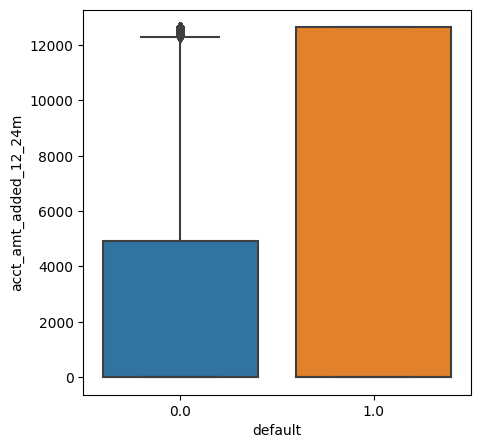

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["acct_amt_added_12_24m"],x=df["default"])
plt.show()

* The total amount of the purchases made using the credit card between 24 months in the past to the present date to the 12 months in the past to the current date has not much affect on default of the credit card.

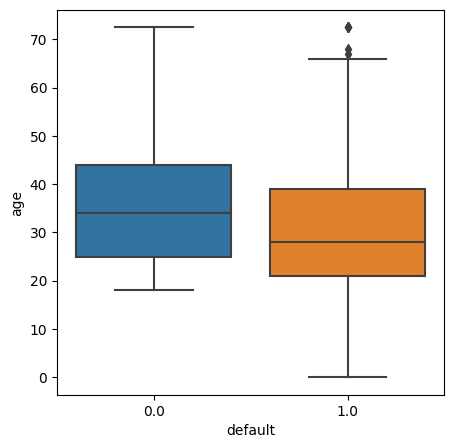

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["age"],x=df["default"])
plt.show()

* Median age of the dafualted credit card customers is less than the median age of the non defaulted age of the credit card holder.
* Age variable has impact on the default of the credit card.

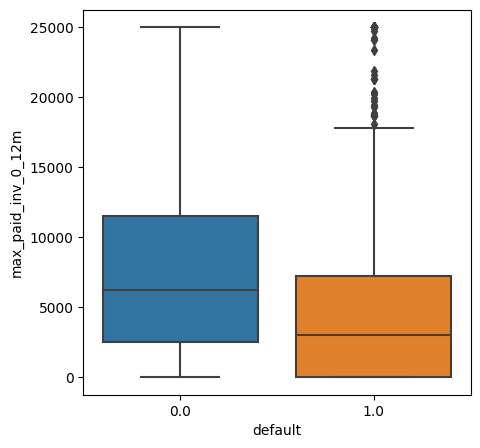

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["max_paid_inv_0_12m"],x=df["default"])
plt.show()

* The maximum credit card bill amount that has been paid by the customer in the last one year variable has an impact on the default of the credit card.
* If the mean amount paid by the customer is less than 5000, there is high chance of credit card being defaulted.

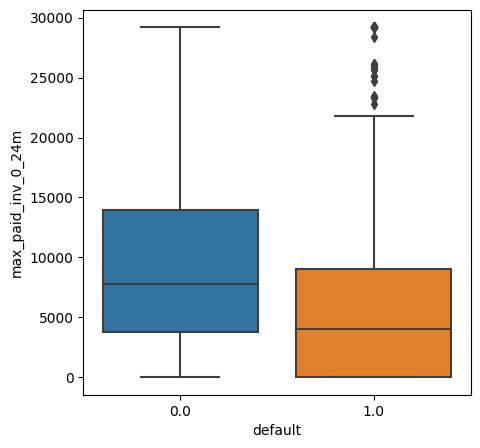

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["max_paid_inv_0_24m"],x=df["default"])
plt.show()

* The maximum credit card bill amount that has been paid by the customer in the last two years has an impact on the defualt of the credit card.
* If the mean of max amount paid by the customer is less than 5000 in the last 2 years, credit card will get defaulted.

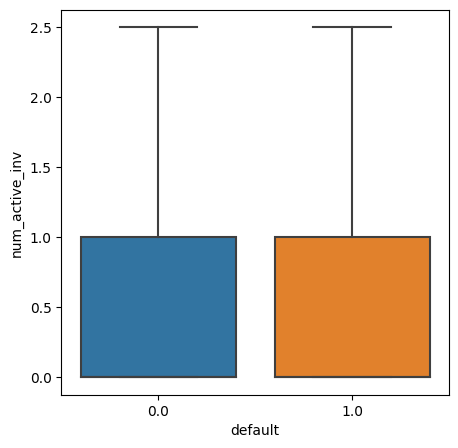

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["num_active_inv"],x=df["default"])
plt.show()

* Number of the active invoices (unpaid bills) variable had not much impact on credit card being defaulted.

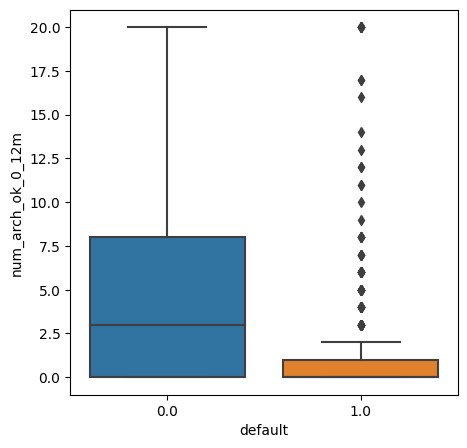

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["num_arch_ok_0_12m"],x=df["default"])
plt.show()

* Number of archived purchases that were paid in the last one year has no impact on credit card being defualted.

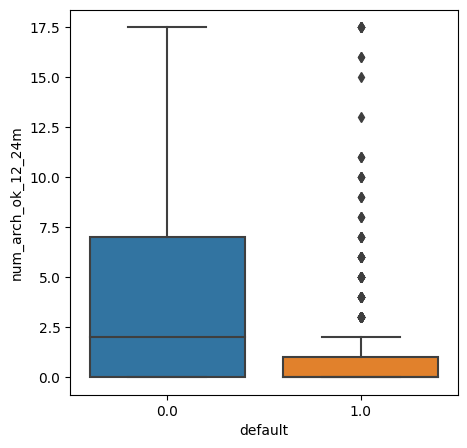

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["num_arch_ok_12_24m"],x=df["default"])
plt.show()

* Number of archived purchases that were paid  between 24 months in the past to the present date and 12 months in the past to the current date has no impact on credit card being defaulted.

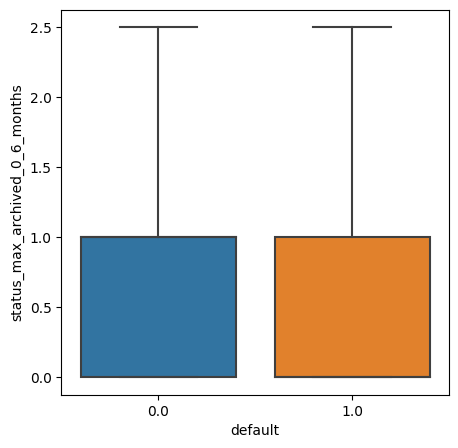

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["status_max_archived_0_6_months"],x=df["default"])
plt.show()

* Maximum number of times the account was in archived status in the last 6 months has not much impact on credit card being defaulted.

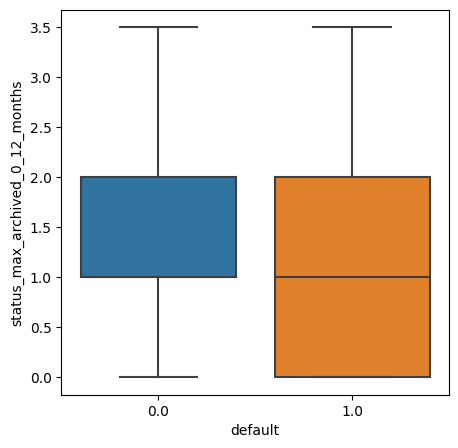

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["status_max_archived_0_12_months"],x=df["default"])
plt.show()

* Maximum number of times the account was in archived status in the last one year has an impact on credit card being at default.
* If the mean of maximum number of times account was in archives status in the last one year is less than 1, then there is a chance the card being defaulted.

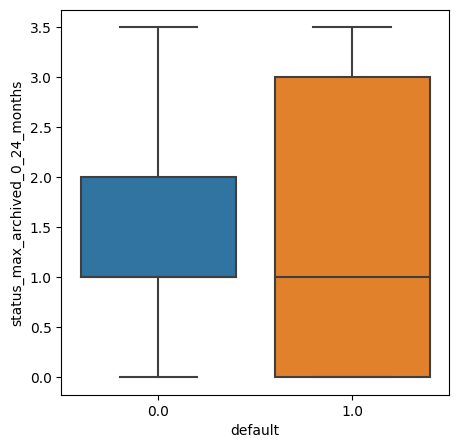

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["status_max_archived_0_24_months"],x=df["default"])
plt.show()

* Maximum number of times the account was in archived status in the last two years has an impact on credit card being defaulted.
* If the median or mean values of the max number of time acount was in archived status in the last 2 years is less than 1, there is chance the credit card is being defaulted.

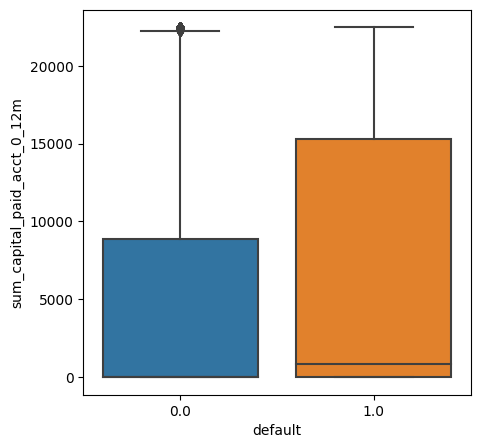

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["sum_capital_paid_acct_0_12m"],x=df["default"])
plt.show()

* Sum of pirncipal balance paid on account in the last one year has not much impact on credit card being defaulted

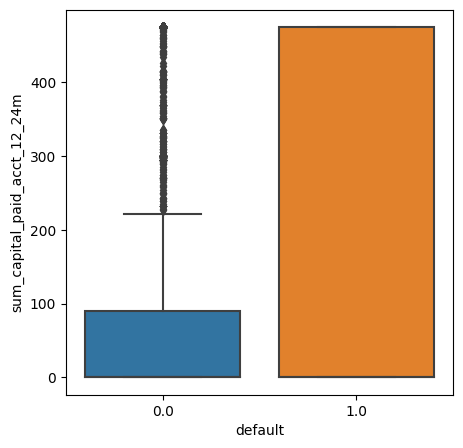

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["sum_capital_paid_acct_12_24m"],x=df["default"])
plt.show()

* Sum of pirncipal balance paid on account between 24 months in the past to the present date and 12 months in the past to the current date has not much impact on credit card being defaulted.

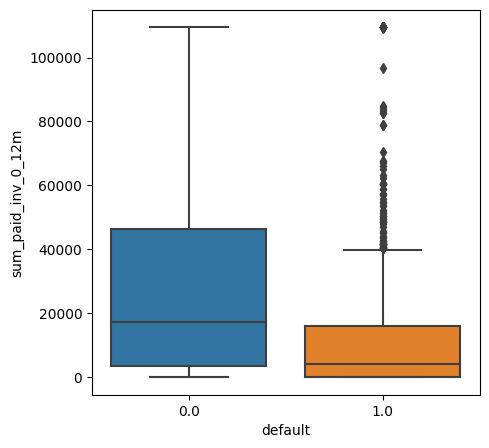

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["sum_paid_inv_0_12m"],x=df["default"])
plt.show()

* The total amount of the paid invoices in the last one year has an impact on credit card being defaulted.
* If the mean of total amount of the paid invoices in the last one year is less than 15000, there likely chance than the credit card is being defaulted.

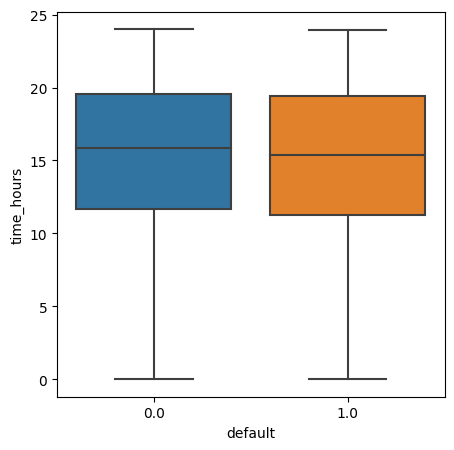

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["time_hours"],x=df["default"])
plt.show()

* The total hours spent by the customer in purchases made using the credit card does not have impact on credit card being defaulted.

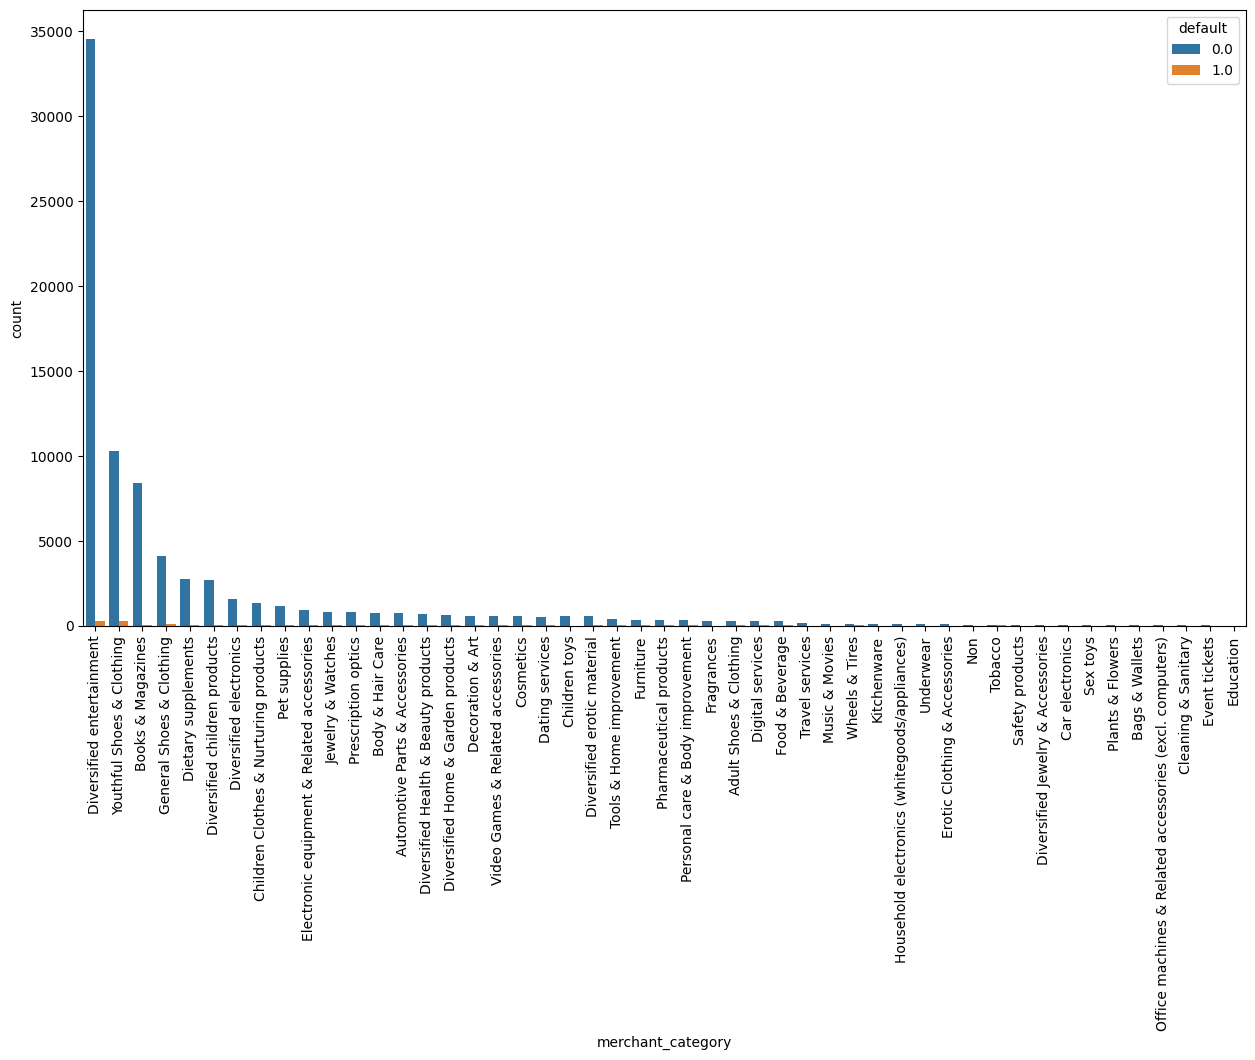

In [ ]:
category_order=df["merchant_category"].value_counts().index
plt.figure(figsize=(15,8))
sns.countplot(x=df["merchant_category"],hue=df["default"],order=category_order)
plt.xticks(rotation=90)
plt.show()

* Diversified entertainment and youthful shoes & clothing, both have equal chance of getting defaulted.

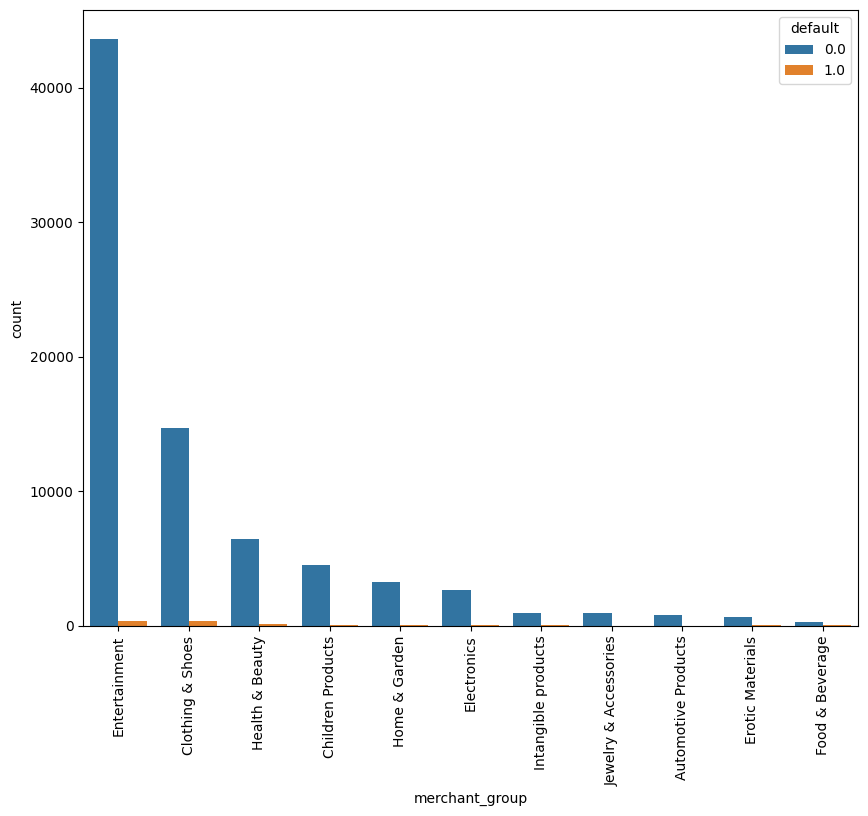

In [ ]:
category_order=df["merchant_group"].value_counts().index
plt.figure(figsize=(10,8))
sns.countplot(x=df["merchant_group"],hue=df["default"],order=category_order)
plt.xticks(rotation=90)
plt.show()

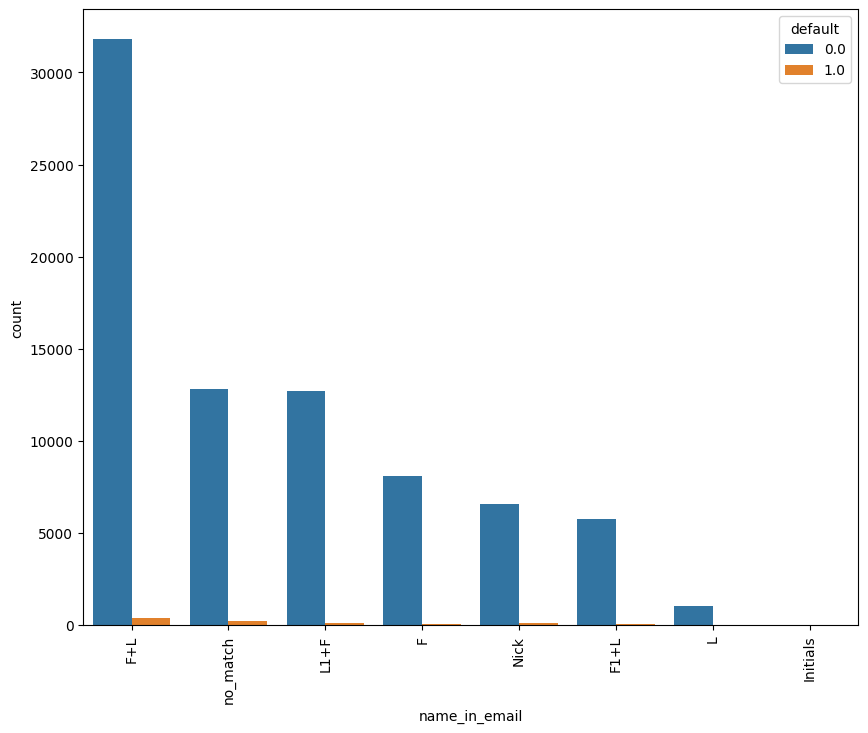

In [ ]:
category_order=df["name_in_email"].value_counts().index
plt.figure(figsize=(10,8))
sns.countplot(x=df["name_in_email"],hue=df["default"],order=category_order)
plt.xticks(rotation=90)
plt.show()

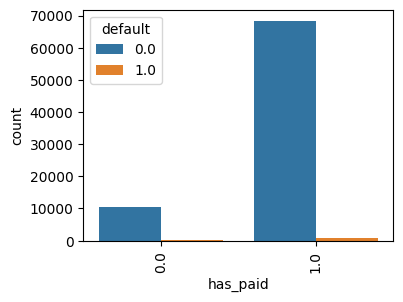

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["has_paid"],hue=df["default"])
plt.xticks(rotation=90)
plt.show()

* There are many transcation where customer has paid the current credit card bill.
* There is default rate even if the most of the customers has paid current credit card bill.

In [23]:
df["merchant_category"]=df["merchant_category"].astype("category")
df["merchant_group"]=df["merchant_group"].astype("category")
df["name_in_email"]=df["name_in_email"].astype("category")

In [24]:
df["merchant_category"]=df["merchant_category"].cat.codes
df["merchant_category"].value_counts()

19    34782
48    10524
4      8447
28     4162
12     2777
17     2691
18     1627
6      1357
36     1185
22      946
30      815
39      803
3       766
1       749
14      710
15      641
11      599
46      598
9       580
10      569
7       566
20      560
43      409
27      340
37      334
35      331
26      288
0       272
13      271
25      263
44      165
32      114
47       99
31       82
29       75
45       75
23       74
33       64
42       58
40       50
16       46
5        41
41       36
38       32
2        21
34       15
8        12
24       11
21        1
Name: merchant_category, dtype: int64

In [25]:
df["merchant_group"]=df["merchant_group"].cat.codes
df["merchant_group"].value_counts()

4     43941
2     15033
7      6589
1      4614
8      3350
3      2704
9      1017
10      946
0       848
5       670
6       321
Name: merchant_group, dtype: int64

In [26]:
df["name_in_email"]=df["name_in_email"].cat.codes
df["name_in_email"].value_counts()

1    32221
7    13075
5    12881
0     8225
6     6697
2     5867
4     1048
3       19
Name: name_in_email, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
x=df.drop(["default"],axis=1)
y=df["default"]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_test.head()

,merchant_category,merchant_group,name_in_email,has_paid,acct_amt_added_12_24m,age,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_inv,num_arch_ok_0_12m,num_arch_ok_12_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
53411,22,3,5,1.0,0.0,62.0,7585.0,7585.0,0.0,17.0,15.0,2.0,2.0,2.0,0.0,0.0,64060.0,12.345278
72010,19,4,7,1.0,0.0,24.0,3285.0,3285.0,1.0,4.0,6.0,0.0,1.0,1.0,0.0,0.0,6460.0,20.910000
26820,22,3,1,1.0,12642.5,27.0,3960.0,12065.0,2.0,1.0,15.0,1.0,2.0,2.0,22472.5,475.0,7550.0,13.584444
74242,19,4,6,1.0,0.0,24.0,5500.0,5500.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,5500.0,10.584444
16381,15,8,1,1.0,0.0,41.0,24277.0,29202.5,1.0,20.0,3.0,1.0,2.0,2.0,0.0,0.0,109472.5,19.521944


In [31]:
y_train.value_counts()

0.0    55247
1.0      776
Name: default, dtype: int64

In [32]:
sm=SMOTE(random_state=1)

In [33]:
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)
y_train_res.value_counts()

0.0    55247
1.0    55247
Name: default, dtype: int64

#Logistic Regression

In [34]:
LR=LogisticRegression()

In [35]:
LR_model=LR.fit(x_train_res,y_train_res)

In [36]:
y_train_predict=LR_model.predict(x_train_res)
y_test_predict=LR_model.predict(x_test)

In [37]:
print(confusion_matrix(y_train_res,y_train_predict))
print(classification_report(y_train_res,y_train_predict))

[[37082 18165]
 [18033 37214]]
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67     55247
         1.0       0.67      0.67      0.67     55247

    accuracy                           0.67    110494
   macro avg       0.67      0.67      0.67    110494
weighted avg       0.67      0.67      0.67    110494



In [38]:
print(confusion_matrix(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))

[[15917  7759]
 [   94   240]]
              precision    recall  f1-score   support

         0.0       0.99      0.67      0.80     23676
         1.0       0.03      0.72      0.06       334

    accuracy                           0.67     24010
   macro avg       0.51      0.70      0.43     24010
weighted avg       0.98      0.67      0.79     24010



In [40]:
tn,fp,fn,tp=confusion_matrix(y_train_res,y_train_predict).ravel()
tn,fp,fn,tp

(37082, 18165, 18033, 37214)

In [41]:
tn,fp,fn,tp=confusion_matrix(y_test,y_test_predict).ravel()
tn,fp,fn,tp

(15917, 7759, 94, 240)

In [43]:
y_trainprobs=LR_model.predict_proba(x_train_res)
y_testprobs=LR_model.predict_proba(x_test)

In [44]:
y_trainprobs=y_trainprobs[:,1]

In [45]:
y_testprobs=y_testprobs[:,1]

0.7405345160098267


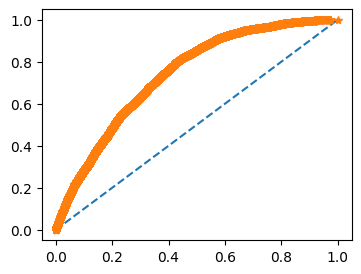

In [49]:
auc_trainLG=roc_auc_score(y_train_res,y_trainprobs)
print(auc_trainLG)
fpr,tpr,thresholds=roc_curve(y_train_res,y_trainprobs)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

0.7624818786147927


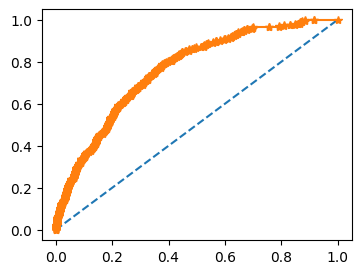

In [50]:
auc_testLG=roc_auc_score(y_test,y_testprobs)
print(auc_testLG)
fpr,tpr,thresholds=roc_curve(y_test,y_testprobs)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

#Decision Tree Classifier

In [51]:
DT=DecisionTreeClassifier()

In [52]:
model_DT=DT.fit(x_train_res,y_train_res)

In [53]:
y_trainpredDT=model_DT.predict(x_train_res)
y_testpredDT=model_DT.predict(x_test)

In [54]:
print(confusion_matrix(y_train_res,y_trainpredDT))
print(classification_report(y_train_res,y_trainpredDT))

[[55247     0]
 [    0 55247]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     55247
         1.0       1.00      1.00      1.00     55247

    accuracy                           1.00    110494
   macro avg       1.00      1.00      1.00    110494
weighted avg       1.00      1.00      1.00    110494



In [56]:
print(confusion_matrix(y_test,y_testpredDT))
print(classification_report(y_test,y_testpredDT))

[[23116   560]
 [  281    53]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     23676
         1.0       0.09      0.16      0.11       334

    accuracy                           0.96     24010
   macro avg       0.54      0.57      0.55     24010
weighted avg       0.98      0.96      0.97     24010



In [57]:
tn,fp,fn,tp=confusion_matrix(y_train_res,y_trainpredDT).ravel()
tn,fp,fn,tp

(55247, 0, 0, 55247)

In [59]:
tn,fp,fn,tp=confusion_matrix(y_test,y_testpredDT).ravel()
tn,fp,fn,tp

(23116, 560, 281, 53)

In [60]:
y_trainprobsDT=model_DT.predict_proba(x_train_res)
y_testprobsDT=model_DT.predict_proba(x_test)

In [61]:
y_trainprobsDT=y_trainprobsDT[:,1]

In [64]:
y_testprobsDT=y_testprobsDT[:,1]

1.0


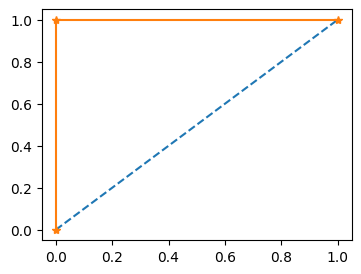

In [65]:
auc_scoreDT=roc_auc_score(y_train_res,y_trainprobsDT)
print(auc_scoreDT)
fpr,tpr,thresholds=roc_curve(y_train_res,y_trainprobsDT)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

0.5675149953514158


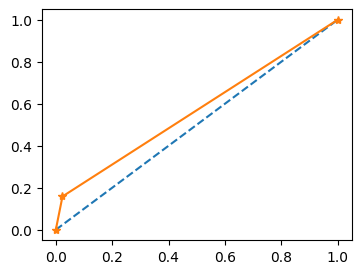

In [66]:
auc_scoretestDT=roc_auc_score(y_test,y_testprobsDT)
print(auc_scoretestDT)
fpr,tpr,thresholds=roc_curve(y_test,y_testprobsDT)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

#Random Forest Classifier

In [68]:
RF=RandomForestClassifier()

In [69]:
RF_model=RF.fit(x_train_res,y_train_res)

In [71]:
y_trainpredRF=RF_model.predict(x_train_res)
y_testpredRF=RF_model.predict(x_test)

In [72]:
print(confusion_matrix(y_train_res,y_trainpredRF))
print(classification_report(y_train_res,y_trainpredRF))

[[55247     0]
 [    0 55247]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     55247
         1.0       1.00      1.00      1.00     55247

    accuracy                           1.00    110494
   macro avg       1.00      1.00      1.00    110494
weighted avg       1.00      1.00      1.00    110494



In [74]:
print(confusion_matrix(y_test,y_testpredRF))
print(classification_report(y_test,y_testpredRF))

[[23488   188]
 [  293    41]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     23676
         1.0       0.18      0.12      0.15       334

    accuracy                           0.98     24010
   macro avg       0.58      0.56      0.57     24010
weighted avg       0.98      0.98      0.98     24010



In [75]:
tn,fp,fn,tp=confusion_matrix(y_train_res,y_trainpredRF).ravel()
tn,fp,fn,tp

(55247, 0, 0, 55247)

In [77]:
tn,fp,fn,tp=confusion_matrix(y_test,y_testpredRF).ravel()
tn,fp,fn,tp

(23488, 188, 293, 41)

In [79]:
y_trainprobsRF=RF_model.predict_proba(x_train_res)
y_testprobsRF=RF_model.predict_proba(x_test)

In [80]:
y_trainprobsRF=y_trainprobsRF[:,1]

In [81]:
y_testprobsRF=y_testprobsRF[:,1]

1.0


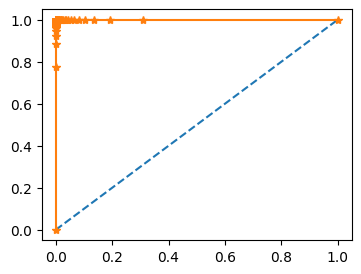

In [83]:
auc_scoretrainRF=roc_auc_score(y_train_res,y_trainprobsRF)
print(auc_scoretrainRF)
fpr,tpr,thresholds=roc_curve(y_train_res,y_trainprobsRF)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

0.8474219199715116


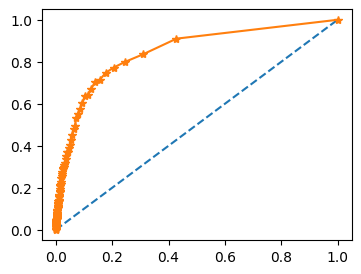

In [84]:
auc_scoretestRF=roc_auc_score(y_test,y_testprobsRF)
print(auc_scoretestRF)
fpr,tpr,thresholds=roc_curve(y_test,y_testprobsRF)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

#Model Tuning
#Logistic Regression - Grid Search

In [85]:
solvers=["newton-cg","liblinear","saga","lbfgs"]
penalty=["l1","l2"]
c_values=[100,10,1.0,0.1,0.01]
grid=dict(solver=solvers,penalty=penalty,C=c_values)

In [87]:
gs=GridSearchCV(estimator=LR,param_grid=grid,n_jobs=-1)

In [88]:
gs.fit(x_train_res,y_train_res)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear', 'saga', 'lbfgs']})

In [89]:
gs.cv_results_["params"]

[{'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'},
 {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'},
 {'C': 100, 'penalty': 'l1', 'solver': 'saga'},
 {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'},
 {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'},
 {'C': 100, 'penalty': 'l2', 'solver': 'saga'},
 {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'},
 {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'},
 {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'},
 {'C': 10, 'penalty': 'l1', 'solver': 'saga'},
 {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'},
 {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'},
 {'C': 10, 'penalty': 'l2', 'solver': 'saga'},
 {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'},
 {'C': 1.0, 'penalty': 'l1', 'solver': 'newton-cg'},
 {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'},
 {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'},
 {'C': 1.0, 'penalty': 'l1', 'solver': 'lb

In [90]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [91]:
lg=LogisticRegression(C=0.1,penalty="l2",solver="newton-cg")
LG_model=lg.fit(x_train_res,y_train_res)

In [92]:
y_trainpredLG=LG_model.predict(x_train_res)
y_testpredLG=LG_model.predict(x_test)

In [93]:
print(confusion_matrix(y_train_res,y_trainpredLG))
print(classification_report(y_train_res,y_trainpredLG))

[[37776 17471]
 [ 7252 47995]]
              precision    recall  f1-score   support

         0.0       0.84      0.68      0.75     55247
         1.0       0.73      0.87      0.80     55247

    accuracy                           0.78    110494
   macro avg       0.79      0.78      0.77    110494
weighted avg       0.79      0.78      0.77    110494



In [94]:
tn,fp,fn,tp=confusion_matrix(y_train_res,y_trainpredLG).ravel()
tn,fp,fn,tp

(37776, 17471, 7252, 47995)

In [95]:
print(confusion_matrix(y_test,y_testpredLG))
print(classification_report(y_test,y_testpredLG))

[[16075  7601]
 [   50   284]]
              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81     23676
         1.0       0.04      0.85      0.07       334

    accuracy                           0.68     24010
   macro avg       0.52      0.76      0.44     24010
weighted avg       0.98      0.68      0.80     24010



In [96]:
tn,fp,fn,tp=confusion_matrix(y_test,y_testpredLG).ravel()
tn,fp,fn,tp

(16075, 7601, 50, 284)

In [98]:
y_trainprobsLG=LG_model.predict_proba(x_train_res)
y_testprobsLG=LG_model.predict_proba(x_test)

In [99]:
y_trainprobsLG=y_trainprobsLG[:,1]

In [100]:
y_testprobsLG=y_testprobsLG[:,1]

0.8403637537384052


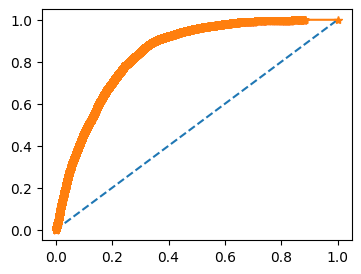

In [101]:
auc_scoretrainLG=roc_auc_score(y_train_res,y_trainprobsLG)
print(auc_scoretrainLG)
fpr,tpr,thresholds=roc_curve(y_train_res,y_trainprobsLG)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

0.8455768392257553


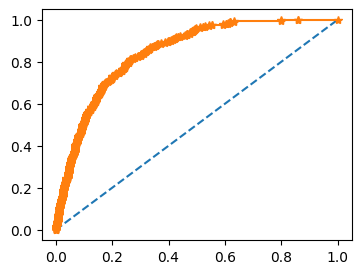

In [102]:
auc_scoretestLG=roc_auc_score(y_test,y_testprobsLG)
print(auc_scoretestLG)
fpr,tpr,thresholds=roc_curve(y_test,y_testprobsLG)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

#Boosting Classifier

In [145]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

In [107]:
AB=AdaBoostClassifier(n_estimators=100,random_state=1)
model_AB=AB.fit(x_train_res,y_train_res)

In [112]:
y_trainpredAB=model_AB.predict(x_train_res)
y_testpredAB=model_AB.predict(x_test)

In [113]:
print(confusion_matrix(y_train_res,y_trainpredAB))
print(classification_report(y_train_res,y_trainpredAB))

[[49591  5656]
 [ 3850 51397]]
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91     55247
         1.0       0.90      0.93      0.92     55247

    accuracy                           0.91    110494
   macro avg       0.91      0.91      0.91    110494
weighted avg       0.91      0.91      0.91    110494



In [114]:
tn,fp,fn,tp=confusion_matrix(y_train_res,y_trainpredAB).ravel()
tn,fp,fn,tp

(49591, 5656, 3850, 51397)

In [115]:
print(confusion_matrix(y_test,y_testpredAB))
print(classification_report(y_test,y_testpredAB))

[[21207  2469]
 [  175   159]]
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     23676
         1.0       0.06      0.48      0.11       334

    accuracy                           0.89     24010
   macro avg       0.53      0.69      0.52     24010
weighted avg       0.98      0.89      0.93     24010



In [116]:
tn,fp,fn,tp=confusion_matrix(y_test,y_testpredAB).ravel()
tn,fp,fn,tp

(21207, 2469, 175, 159)

In [117]:
y_trainprobsAB=model_AB.predict_proba(x_train_res)
y_testprobsAB=model_AB.predict_proba(x_test)

In [118]:
y_trainprobsAB=y_trainprobsAB[:,1]

In [119]:
y_testprobsAB=y_testprobsAB[:,1]

0.9797407229932247


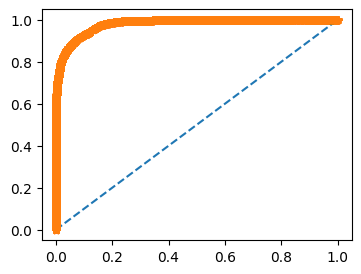

In [120]:
auc_scoretrainAB=roc_auc_score(y_train_res,y_trainprobsAB)
print(auc_scoretrainAB)
fpr,tpr,thresholds=roc_curve(y_train_res,y_trainprobsAB)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

0.8420027658823256


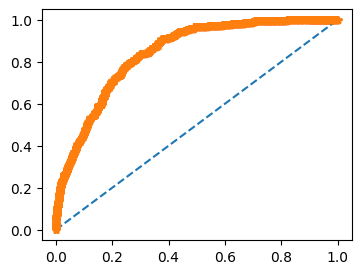

In [121]:
auc_scoretestAB=roc_auc_score(y_test,y_testprobsAB)
print(auc_scoretestAB)
fpr,tpr,thresholds=roc_curve(y_test,y_testprobsAB)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

#Gradient Boosting

In [122]:
GB=GradientBoostingClassifier(n_estimators=100,random_state=1)
model_GB=GB.fit(x_train_res,y_train_res)

In [123]:
y_trainpredGB=model_GB.predict(x_train_res)
y_testpredGB=model_GB.predict(x_test)

In [124]:
print(confusion_matrix(y_train_res,y_trainpredGB))
print(classification_report(y_train_res,y_trainpredGB))

[[50862  4385]
 [ 2634 52613]]
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94     55247
         1.0       0.92      0.95      0.94     55247

    accuracy                           0.94    110494
   macro avg       0.94      0.94      0.94    110494
weighted avg       0.94      0.94      0.94    110494



In [125]:
tn,fp,fn,tp=confusion_matrix(y_train_res,y_trainpredGB).ravel()
tn,fp,fn,tp

(50862, 4385, 2634, 52613)

In [127]:
print(confusion_matrix(y_test,y_testpredGB))
print(classification_report(y_test,y_testpredGB))

[[21708  1968]
 [  195   139]]
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     23676
         1.0       0.07      0.42      0.11       334

    accuracy                           0.91     24010
   macro avg       0.53      0.67      0.53     24010
weighted avg       0.98      0.91      0.94     24010



In [128]:
tn,fp,fn,tp=confusion_matrix(y_test,y_testpredGB).ravel()
tn,fp,fn,tp

(21708, 1968, 195, 139)

In [129]:
y_trainprobsGB=model_GB.predict_proba(x_train_res)
y_testprobsGB=model_GB.predict_proba(x_test)

In [135]:
y_trainprobsGB=y_trainprobsGB[:,1]

IndexError: ignored

In [136]:
y_testprobsGB=y_testprobsGB[:,1]

IndexError: ignored

#Random Forest Classifier

In [140]:
grid={"n_estimators" : [25,50,100,150],
      "max_features": ["sqrt","log2",None],
      "max_leaf_nodes": [3,6,9]}
gs=GridSearchCV(RandomForestClassifier(),param_grid=grid)

In [141]:
gs.fit(x_train_res,y_train_res)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [142]:
gs.cv_results_["params"]

[{'max_features': 'sqrt', 'max_leaf_nodes': 3, 'n_estimators': 25},
 {'max_features': 'sqrt', 'max_leaf_nodes': 3, 'n_estimators': 50},
 {'max_features': 'sqrt', 'max_leaf_nodes': 3, 'n_estimators': 100},
 {'max_features': 'sqrt', 'max_leaf_nodes': 3, 'n_estimators': 150},
 {'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 25},
 {'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 50},
 {'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 100},
 {'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 150},
 {'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 25},
 {'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 50},
 {'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 100},
 {'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 150},
 {'max_features': 'log2', 'max_leaf_nodes': 3, 'n_estimators': 25},
 {'max_features': 'log2', 'max_leaf_nodes': 3, 'n_estimators': 50},
 {'max_features': 'log2', 'max_leaf_nodes'

In [143]:
gs.best_params_

{'max_features': 'log2', 'max_leaf_nodes': 9, 'n_estimators': 50}

In [146]:
BC= BaggingClassifier(estimator=RandomForestClassifier(max_features="log2",max_leaf_nodes=9,n_estimators=50),random_state=1)
model_BC=BC.fit(x_train_res,y_train_res)

In [147]:
y_trainpredBC=model_BC.predict(x_train_res)
y_testpredBC=model_BC.predict(x_test)

In [148]:
print(confusion_matrix(y_train_res,y_trainpredBC))
print(classification_report(y_train_res,y_trainpredBC))

[[41325 13922]
 [ 3499 51748]]
              precision    recall  f1-score   support

         0.0       0.92      0.75      0.83     55247
         1.0       0.79      0.94      0.86     55247

    accuracy                           0.84    110494
   macro avg       0.85      0.84      0.84    110494
weighted avg       0.85      0.84      0.84    110494



In [149]:
tn,fp,fn,tp=confusion_matrix(y_train_res,y_trainpredBC).ravel()
tn,fp,fn,tp

(41325, 13922, 3499, 51748)

In [150]:
print(confusion_matrix(y_test,y_testpredBC))
print(classification_report(y_test,y_testpredBC))

[[17637  6039]
 [   74   260]]
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     23676
         1.0       0.04      0.78      0.08       334

    accuracy                           0.75     24010
   macro avg       0.52      0.76      0.47     24010
weighted avg       0.98      0.75      0.84     24010



In [151]:
tn,fp,fn,tp=confusion_matrix(y_test,y_testpredBC).ravel()
tn,fp,fn,tp

(17637, 6039, 74, 260)

In [152]:
y_trainprobsBC=model_BC.predict_proba(x_train_res)
y_testprobsBC=model_BC.predict_proba(x_test)

In [153]:
y_trainprobsBC=y_trainprobsBC[:,1]

In [154]:
y_testprobsBC=y_testprobsBC[:,1]

0.9311636423060795


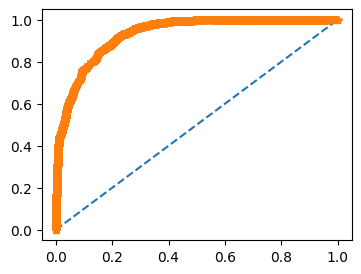

In [155]:
auc_scoretrainBC=roc_auc_score(y_train_res,y_trainprobsBC)
print(auc_scoretrainBC)
fpr,tpr,thresholds=roc_curve(y_train_res,y_trainprobsBC)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

0.8549133992531914


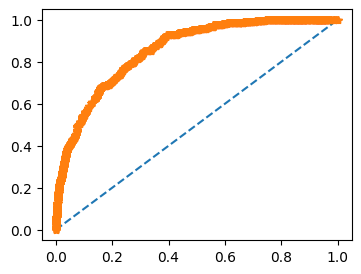

In [156]:
auc_scoretestBC=roc_auc_score(y_test,y_testprobsBC)
print(auc_scoretestBC)
fpr,tpr,thresholds=roc_curve(y_test,y_testprobsBC)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()